<a href="https://colab.research.google.com/github/bansalrachit19/EnergyConsumption/blob/main/EnergyConsumtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

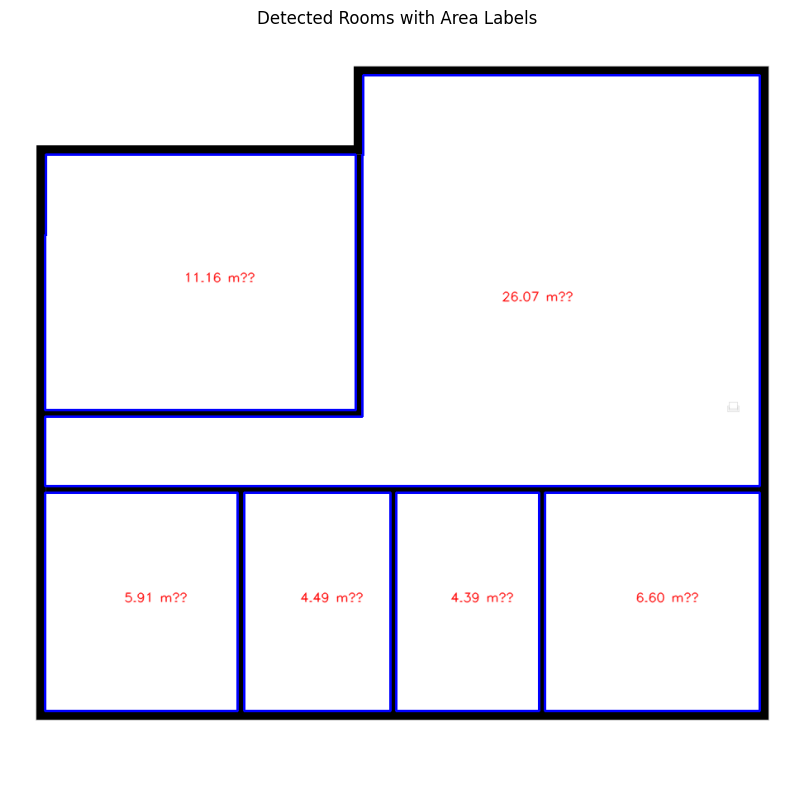

Room 1: 6.60 m²
Room 2: 4.39 m²
Room 3: 4.49 m²
Room 4: 5.91 m²
Room 5: 11.16 m²
Room 6: 26.07 m²


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "floorplan2.png"  # Update with your image path
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

# Apply morphological closing to close small gaps in walls
kernel = np.ones((5,5), np.uint8)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Find contours with hierarchy
contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Define scale (1 meter = 50 pixels)
scale_factor = (1 / 102) ** 2  # Convert from pixel area to square meters

# Filter out only inner room contours (ignore the outermost boundary)
room_contours = [cnt for i, cnt in enumerate(contours) if hierarchy[0][i][3] != -1]

# Create a copy to draw on
image_with_rooms = image.copy()

# Initialize list for area labels
room_areas_sq_m = []

# Loop through detected rooms, calculate area, and draw contours
for i, cnt in enumerate(room_contours):
    area_m2 = cv2.contourArea(cnt) * scale_factor  # Convert to square meters
    room_areas_sq_m.append(area_m2)

    # Get centroid to place text
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = 0, 0  # Default position if moment calculation fails

    # Draw contour and label area
    cv2.drawContours(image_with_rooms, [cnt], -1, (255, 0, 0), 2)  # Blue for rooms
    cv2.putText(image_with_rooms, f"{area_m2:.2f} m²", (cx - 20, cy),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

# Display the final result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_rooms, cv2.COLOR_BGR2RGB))
plt.title("Detected Rooms with Area Labels")
plt.axis("off")
plt.show()

# Print area values for reference
for i, area in enumerate(room_areas_sq_m):
    print(f"Room {i+1}: {area:.2f} m²")

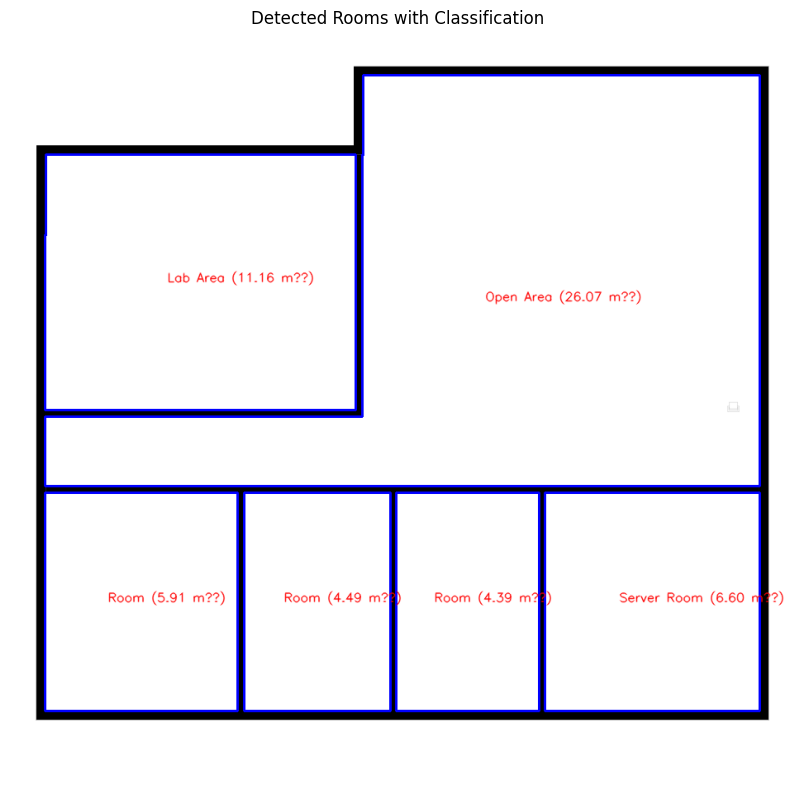


Detected Room Areas and Classifications:
--------------------------------------
Room 1: 6.60 m² - Server Room
Room 2: 4.39 m² - Room
Room 3: 4.49 m² - Room
Room 4: 5.91 m² - Room
Room 5: 11.16 m² - Lab Area
Room 6: 26.07 m² - Open Area


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "floorplan2.png"  # Update with your image path
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

# Apply morphological closing to close small gaps in walls
kernel = np.ones((5, 5), np.uint8)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Find contours with hierarchy
contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Define scale (1 meter = 102 pixels)
scale_factor = (1 / 102) ** 2  # Convert from pixel area to square meters

# Filter out only inner room contours (ignore the outermost boundary)
room_contours = [cnt for i, cnt in enumerate(contours) if hierarchy[0][i][3] != -1]

# Create a copy to draw on
image_with_rooms = image.copy()

# Initialize list for area labels
room_areas_sq_m = []
room_types = []

# Room classification thresholds
def classify_room(area_m2):
    if 4 <= area_m2 <= 6:
        return "Room"
    elif 6 < area_m2 <= 10:
        return "Server Room"
    elif 10 < area_m2 <= 15:
        return "Lab Area"
    else:
        return "Open Area"

# Loop through detected rooms, calculate area, classify and draw contours
for i, cnt in enumerate(room_contours):
    area_m2 = cv2.contourArea(cnt) * scale_factor  # Convert to square meters
    room_type = classify_room(area_m2)

    room_areas_sq_m.append(area_m2)
    room_types.append(room_type)

    # Get centroid to place text
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = 0, 0  # Default position if moment calculation fails

    # Draw contour and label area and classification
    cv2.drawContours(image_with_rooms, [cnt], -1, (255, 0, 0), 2)  # Blue for rooms
    cv2.putText(image_with_rooms, f"{room_type} ({area_m2:.2f} m²)", (cx - 40, cy),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

# Display the final result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_rooms, cv2.COLOR_BGR2RGB))
plt.title("Detected Rooms with Classification")
plt.axis("off")
plt.show()

# Print area values for reference
print("\nDetected Room Areas and Classifications:")
print("--------------------------------------")
for i, (area, room_type) in enumerate(zip(room_areas_sq_m, room_types)):
    print(f"Room {i+1}: {area:.2f} m² - {room_type}")


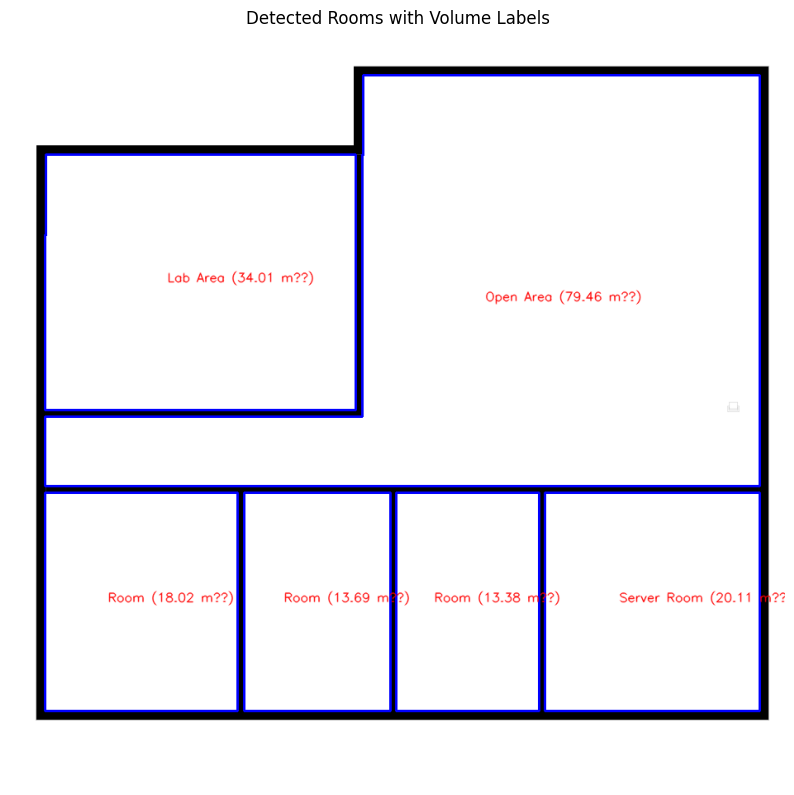


Detected Room Volumes and Power Consumption:
------------------------------------------------
Server Room 2:
  - Volume: 20.11 m³
  - Lighting Power: 30.16 W
  - Avg Cooling Power: 1749.44 W
------------------------------------------------
Room 3:
  - Volume: 13.38 m³
  - Lighting Power: 26.76 W
  - Avg Cooling Power: 388.01 W
------------------------------------------------
Room 4:
  - Volume: 13.69 m³
  - Lighting Power: 27.38 W
  - Avg Cooling Power: 396.98 W
------------------------------------------------
Room 5:
  - Volume: 18.02 m³
  - Lighting Power: 36.04 W
  - Avg Cooling Power: 522.59 W
------------------------------------------------
Lab Area 6:
  - Volume: 34.01 m³
  - Lighting Power: 102.03 W
  - Avg Cooling Power: 1578.00 W
------------------------------------------------
Open Area 7:
  - Volume: 79.46 m³
  - Lighting Power: 79.46 W
  - Avg Cooling Power: 1843.38 W
------------------------------------------------


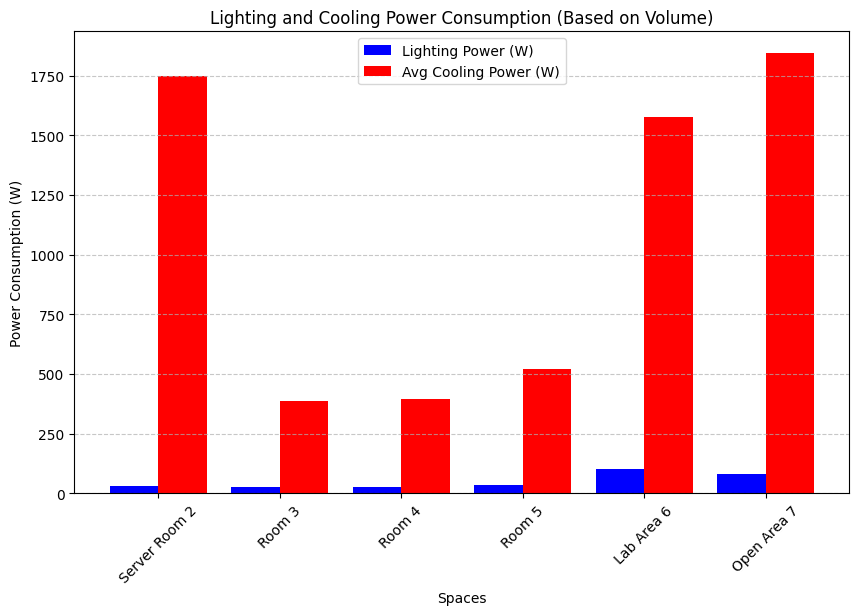

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "floorplan2.png"  # Update with your image path
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

# Apply morphological closing to close small gaps in walls
kernel = np.ones((5, 5), np.uint8)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Find contours with hierarchy
contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Define scale (1 meter = 102 pixels)
scale_factor = (1 / 102) ** 2  # Convert from pixel area to square meters

# Fixed height for all rooms
FIXED_HEIGHT = 3.048  # meters

# Room classification function
def classify_room(area_m2):
    if 4 <= area_m2 <= 6:
        return "Room", 2, 5  # Room: 2 W/m³ (lighting), 5 W/m³ per °C (cooling)
    elif 6 < area_m2 <= 10:
        return "Server Room", 1.5, 15  # Server Room: 1.5 W/m³ (lighting), 15 W/m³ per °C (cooling)
    elif 10 < area_m2 <= 15:
        return "Lab Area", 3, 8  # Lab: 3 W/m³ (lighting), 8 W/m³ per °C (cooling)
    else:
        return "Open Area", 1, 4  # Open Area: 1 W/m³ (lighting), 4 W/m³ per °C (cooling)


# Set indoor & outdoor temperature for cooling calculations
INSIDE_TEMP = 24  # °C
OUTSIDE_TEMPS = [25, 27, 30, 32, 35]  # °C

# Create a copy to draw on
image_with_rooms = image.copy()

# Initialize list for calculations
detected_rooms = []

# Loop through detected rooms
for i, cnt in enumerate(contours):
    if hierarchy[0][i][3] == -1:
        continue  # Ignore outer boundary

    # Calculate area in square meters
    area_m2 = cv2.contourArea(cnt) * scale_factor

    # Classify room and get its lighting and cooling factors
    room_type, lighting_factor, cooling_factor = classify_room(area_m2)

    # Calculate volume (m³)
    volume_m3 = area_m2 * FIXED_HEIGHT

    # Calculate lighting power (W)
    lighting_power = volume_m3 * lighting_factor

    # Calculate average cooling power (W)
    total_cooling_power = sum((temp - INSIDE_TEMP) * volume_m3 * cooling_factor for temp in OUTSIDE_TEMPS)
    avg_cooling_power = total_cooling_power / len(OUTSIDE_TEMPS)

    # Get centroid to place text
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = 0, 0  # Default position if moment calculation fails

    # Draw contour and label room type & volume
    cv2.drawContours(image_with_rooms, [cnt], -1, (255, 0, 0), 2)
    cv2.putText(image_with_rooms, f"{room_type} ({volume_m3:.2f} m³)", (cx - 40, cy),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

    # Store results
    detected_rooms.append({
        "label": f"{room_type} {i+1}",
        "volume_m3": volume_m3,
        "lighting_power": lighting_power,
        "avg_cooling_power": avg_cooling_power
    })

# Display the final result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_rooms, cv2.COLOR_BGR2RGB))
plt.title("Detected Rooms with Volume Labels")
plt.axis("off")
plt.show()

# Print results
print("\nDetected Room Volumes and Power Consumption:")
print("------------------------------------------------")
for room in detected_rooms:
    print(f"{room['label']}:")
    print(f"  - Volume: {room['volume_m3']:.2f} m³")
    print(f"  - Lighting Power: {room['lighting_power']:.2f} W")
    print(f"  - Avg Cooling Power: {room['avg_cooling_power']:.2f} W")
    print("------------------------------------------------")

# Plot power consumption graph
labels = [room["label"] for room in detected_rooms]
lighting_values = [room["lighting_power"] for room in detected_rooms]
cooling_values = [room["avg_cooling_power"] for room in detected_rooms]

x = np.arange(len(detected_rooms))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, lighting_values, width=0.4, label="Lighting Power (W)", color='blue')
plt.bar(x + 0.2, cooling_values, width=0.4, label="Avg Cooling Power (W)", color='red')

plt.xlabel("Spaces")
plt.ylabel("Power Consumption (W)")
plt.title("Lighting and Cooling Power Consumption (Based on Volume)")
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


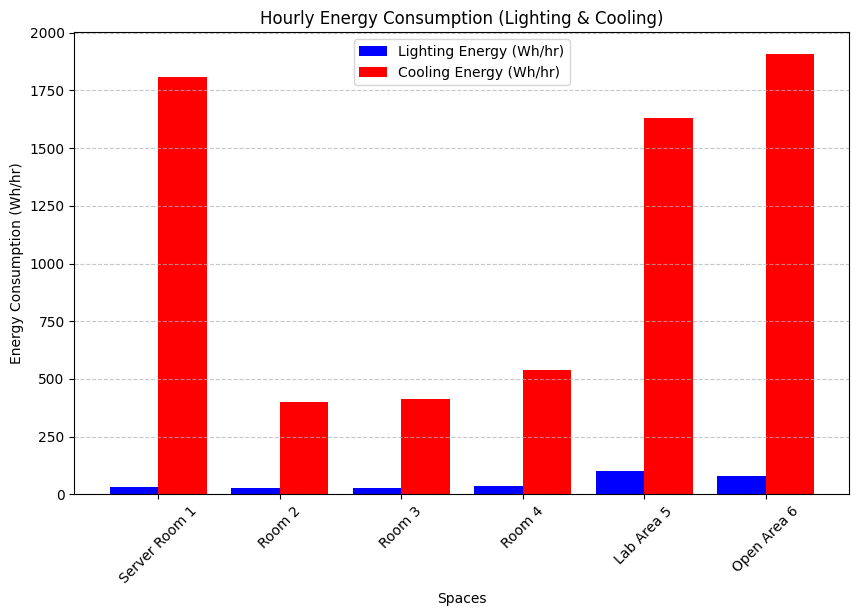


Detected Spaces and Their Energy Consumption:
------------------------------------------------
Server Room 1:
  - Area: 6.60 m²
  - Volume: 20.11 m³
  - Lighting Energy per Hour: 30.16 Wh
  - Total Lighting Energy (10.5 hrs): 316.71 Wh
  - Cooling Energy per Hour: 1809.76 Wh
  - Total Cooling Energy (10.5 hrs): 19002.51 Wh
------------------------------------------------
Room 2:
  - Area: 4.39 m²
  - Volume: 13.38 m³
  - Lighting Energy per Hour: 26.76 Wh
  - Total Lighting Energy (10.5 hrs): 280.97 Wh
  - Cooling Energy per Hour: 401.39 Wh
  - Total Cooling Energy (10.5 hrs): 4214.60 Wh
------------------------------------------------
Room 3:
  - Area: 4.49 m²
  - Volume: 13.69 m³
  - Lighting Energy per Hour: 27.38 Wh
  - Total Lighting Energy (10.5 hrs): 287.47 Wh
  - Cooling Energy per Hour: 410.67 Wh
  - Total Cooling Energy (10.5 hrs): 4312.05 Wh
------------------------------------------------
Room 4:
  - Area: 5.91 m²
  - Volume: 18.02 m³
  - Lighting Energy per Hour: 36.04 Wh

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Constants
SCALE_PIXELS_PER_METER = 102  # Scale conversion
HEIGHT = 3.048  # Room height in meters
WORKING_HOURS = 10.5  # From 7:30 AM to 6 PM
INSIDE_TEMP = 24  # Indoor target temp (°C)
OUTSIDE_TEMP = 30  # Average outside temp during work hours
TEMP_DIFF = max(OUTSIDE_TEMP - INSIDE_TEMP, 0)  # Temperature difference

# Room classification and power densities
def classify_room(area_m2):
    if 4 <= area_m2 <= 6:
        return "Room", 2, 5  # Lighting: 2 W/m³, Cooling: 5 W/m³ per °C
    elif 6 < area_m2 <= 10:
        return "Server Room", 1.5, 15  # Lighting: 1.5 W/m³, Cooling: 15 W/m³ per °C
    elif 10 < area_m2 <= 15:
        return "Lab Area", 3, 8  # Lighting: 3 W/m³, Cooling: 8 W/m³ per °C
    else:
        return "Open Area", 1, 4  # Lighting: 1 W/m³, Cooling: 4 W/m³ per °C

# Load floor plan and preprocess
image_path = "floorplan2.png"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((5,5), np.uint8)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Detect contours (rooms)
contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
room_contours = [cnt for i, cnt in enumerate(contours) if hierarchy[0][i][3] != -1]

# Store detected room data
detected_spaces = []

for i, cnt in enumerate(room_contours):
    area_m2 = cv2.contourArea(cnt) * (1 / SCALE_PIXELS_PER_METER) ** 2
    volume_m3 = area_m2 * HEIGHT  # Calculate volume

    room_type, lighting_wm3, cooling_wm3 = classify_room(area_m2)

    # Calculate power consumption
    lighting_power = lighting_wm3 * volume_m3  # Watts
    cooling_power = cooling_wm3 * volume_m3 * TEMP_DIFF  # Watts

    # Convert to energy (Wh)
    lighting_energy_hourly = lighting_power
    lighting_energy_total = lighting_energy_hourly * WORKING_HOURS

    cooling_energy_hourly = cooling_power
    cooling_energy_total = cooling_energy_hourly * WORKING_HOURS

    detected_spaces.append({
        "label": f"{room_type} {i+1}",
        "area_m2": area_m2,
        "volume_m3": volume_m3,
        "lighting_energy_hourly": lighting_energy_hourly,
        "lighting_energy_total": lighting_energy_total,
        "cooling_energy_hourly": cooling_energy_hourly,
        "cooling_energy_total": cooling_energy_total
    })

# Plot power consumption per hour
labels = [space["label"] for space in detected_spaces]
lighting_values = [space["lighting_energy_hourly"] for space in detected_spaces]
cooling_values = [space["cooling_energy_hourly"] for space in detected_spaces]

x = np.arange(len(detected_spaces))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, lighting_values, width=0.4, label="Lighting Energy (Wh/hr)", color='blue')
plt.bar(x + 0.2, cooling_values, width=0.4, label="Cooling Energy (Wh/hr)", color='red')

plt.xlabel("Spaces")
plt.ylabel("Energy Consumption (Wh/hr)")
plt.title("Hourly Energy Consumption (Lighting & Cooling)")
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Print results
print("\nDetected Spaces and Their Energy Consumption:")
print("------------------------------------------------")
for space in detected_spaces:
    print(f"{space['label']}:")
    print(f"  - Area: {space['area_m2']:.2f} m²")
    print(f"  - Volume: {space['volume_m3']:.2f} m³")
    print(f"  - Lighting Energy per Hour: {space['lighting_energy_hourly']:.2f} Wh")
    print(f"  - Total Lighting Energy (10.5 hrs): {space['lighting_energy_total']:.2f} Wh")
    print(f"  - Cooling Energy per Hour: {space['cooling_energy_hourly']:.2f} Wh")
    print(f"  - Total Cooling Energy (10.5 hrs): {space['cooling_energy_total']:.2f} Wh")
    print("------------------------------------------------")
